In [47]:
import numpy as np 
import sklearn 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 

Loading training and testing data to pandas dataframes

In [48]:
sample = pd.read_csv('stats_202_kaggle/sample.csv')
train = pd.read_csv('stats_202_kaggle/train.csv', index_col='Id')
test = pd.read_csv('stats_202_kaggle/test.csv', index_col='Id')

Look at the dataframe

In [49]:
train.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,Activity
Id,,,,,,,,,,,,,,,,,,,,,
1,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,stand
2,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,stand
3,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,stand
4,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,stand
5,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,stand


General Info; Memory Usage

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7767 entries, 1 to 7767
Columns: 562 entries, tBodyAcc-Mean-1 to Activity
dtypes: float64(561), object(1)
memory usage: 33.4+ MB


Summary Statistics for each column

In [51]:
train.describe()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
count,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,...,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000
mean,0.038759,-0.000647,-0.018155,-0.599017,-0.634424,-0.691270,-0.623886,-0.657884,-0.740154,-0.360200,...,0.161745,-0.316548,-0.625132,0.016774,0.018471,0.009239,-0.005184,-0.485936,0.050310,-0.052888
std,0.101996,0.099974,0.089927,0.441481,0.367558,0.321641,0.418113,0.348005,0.272619,0.499259,...,0.237319,0.313899,0.302581,0.331326,0.443540,0.601208,0.477218,0.509278,0.300866,0.276196
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.958535,-1.000000,-1.000000,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.987874
25%,0.032037,-0.011209,-0.028448,-0.992140,-0.983570,-0.984661,-0.992902,-0.984131,-0.986661,-0.795613,...,0.020312,-0.548129,-0.843966,-0.108225,-0.261002,-0.470267,-0.373565,-0.810953,-0.047752,-0.140560
50%,0.038975,-0.002921,-0.019602,-0.914202,-0.827970,-0.827696,-0.924421,-0.838559,-0.852735,-0.717007,...,0.170819,-0.353980,-0.710071,0.017627,0.029079,0.001515,-0.005503,-0.706619,0.176777,0.004583
75%,0.044000,0.004303,-0.011676,-0.246026,-0.313069,-0.450478,-0.294903,-0.362671,-0.540521,0.054178,...,0.316240,-0.137462,-0.503837,0.167695,0.314876,0.496871,0.352690,-0.488765,0.246834,0.109507
max,1.000000,1.000000,1.000000,1.000000,0.945956,1.000000,1.000000,0.960341,1.000000,1.000000,...,1.000000,0.938491,0.911653,1.000000,1.000000,0.998702,0.991288,1.000000,0.482229,1.000000


Number of missing values in each column

In [52]:
train.isnull().sum()

tBodyAcc-Mean-1                    0
tBodyAcc-Mean-2                    0
tBodyAcc-Mean-3                    0
tBodyAcc-STD-1                     0
tBodyAcc-STD-2                     0
                                  ..
tBodyGyroJerk-AngleWRTGravity-1    0
tXAxisAcc-AngleWRTGravity-1        0
tYAxisAcc-AngleWRTGravity-1        0
tZAxisAcc-AngleWRTGravity-1        0
Activity                           0
Length: 562, dtype: int64

In [53]:
train.isnull().sum().sum() # no missing values at all

0

In [54]:
train.nunique() #number of unique elements in the object ; useful in categorical features especially in cases where we do not know the number of categories beforehand 

tBodyAcc-Mean-1                    7767
tBodyAcc-Mean-2                    7767
tBodyAcc-Mean-3                    7767
tBodyAcc-STD-1                     7767
tBodyAcc-STD-2                     7767
                                   ... 
tBodyGyroJerk-AngleWRTGravity-1    7767
tXAxisAcc-AngleWRTGravity-1        7767
tYAxisAcc-AngleWRTGravity-1        7767
tZAxisAcc-AngleWRTGravity-1        7767
Activity                             12
Length: 562, dtype: int64

Memory usage of each column in bytes

In [55]:
train.memory_usage() 

Index                              62136
tBodyAcc-Mean-1                    62136
tBodyAcc-Mean-2                    62136
tBodyAcc-Mean-3                    62136
tBodyAcc-STD-1                     62136
                                   ...  
tBodyGyroJerk-AngleWRTGravity-1    62136
tXAxisAcc-AngleWRTGravity-1        62136
tYAxisAcc-AngleWRTGravity-1        62136
tZAxisAcc-AngleWRTGravity-1        62136
Activity                           62136
Length: 563, dtype: int64

In [56]:
# train.dropna(inplace=True) drop any rows with nan values 

Return first n rows ordered by columns in descending order

In [57]:
train.nlargest(5, 'tBodyGyroJerk-AngleWRTGravity-1')

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,Activity
Id,,,,,,,,,,,,,,,,,,,,,
6797,0.032464,-0.006862,-0.017114,-0.298802,-0.502713,-0.476013,-0.365738,-0.539781,-0.613678,0.050909,...,-0.357529,-0.742800,0.474763,-0.564420,0.955638,0.991288,-0.606448,0.309265,0.197002,up
3251,0.037696,0.008427,-0.036720,-0.987680,-0.969410,-0.918398,-0.991698,-0.971762,-0.947863,-0.796046,...,-0.274585,-0.715794,-0.026671,0.013452,0.847063,0.987531,-0.880439,0.039723,0.089274,stand
2092,0.599410,-0.525516,0.018955,-0.350108,-0.074209,-0.534880,-0.395172,-0.155167,-0.626435,0.340226,...,0.119084,-0.180826,0.221660,0.571314,-0.300102,0.983353,0.181950,-0.678839,-0.136320,lie_to_stand
6002,0.029540,0.002136,-0.005708,-0.151067,-0.387476,-0.571227,-0.277363,-0.419984,-0.629487,0.190154,...,-0.266097,-0.681327,0.428913,0.756939,0.935213,0.982035,-0.789625,0.242869,0.041130,up
4274,0.037645,-0.003669,-0.020530,-0.993992,-0.993485,-0.987257,-0.995019,-0.993732,-0.990513,-0.791044,...,-0.043788,-0.505419,0.267399,0.128890,0.826102,0.979531,-0.591988,0.321847,0.196516,stand


In [58]:
train.duplicated().sum() # no duplicate rows

0

In [59]:
train.dtypes

tBodyAcc-Mean-1                    float64
tBodyAcc-Mean-2                    float64
tBodyAcc-Mean-3                    float64
tBodyAcc-STD-1                     float64
tBodyAcc-STD-2                     float64
                                    ...   
tBodyGyroJerk-AngleWRTGravity-1    float64
tXAxisAcc-AngleWRTGravity-1        float64
tYAxisAcc-AngleWRTGravity-1        float64
tZAxisAcc-AngleWRTGravity-1        float64
Activity                            object
Length: 562, dtype: object

In [60]:
features = [col for col in train.columns if 'Id' not in col and '2' not in col and '3' not in col]

In [61]:
correlation_matrix = train[features].corr()

C:\Users\Amalya\AppData\Local\Temp\ipykernel_28080\816817475.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train[features].corr()


<Axes: >

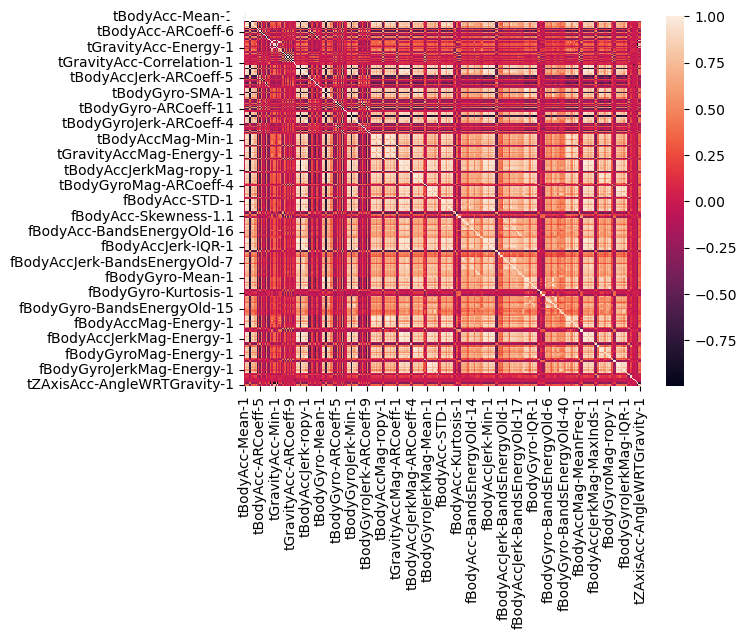

In [62]:
sns.heatmap(correlation_matrix, annot=True)

A heat map is not a smart visualization tool at this scale since there are such a large number of features

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = len(train['Activity'].unique()), random_state=0)

In [64]:
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

In [65]:
Xtrain = np.array(train[train.columns[train.columns != 'Activity']])
to_num = {category:integer for integer, category in enumerate(train['Activity'].unique())}
train['Activity'].replace(to_num, inplace=True)
Xlabels = np.array(train['Activity'])

In [66]:
(n_samples, n_features), n_digits = Xtrain.shape, np.unique(Xlabels).size
print(f"# classes: {n_digits}; # samples: {n_samples}; # features {n_features}")

# classes: 12; # samples: 7767; # features 561


Initial data exploration: can we visualize any clusters in the data?

In [67]:
from time import time
from sklearn import metrics 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [68]:
def bench_k_means(kmeans, name, data, labels): 
    """
    Benchmark to evaluate the Kmeans initialization methods. 

    Parameters 
    ----------
    kmeans: KMeans instance 
        A: class '~sklearn.cluster.Kmeans' instance with initialization already set
    name: str 
        Name given to the strategy. Will be used to show the results in a table 
    data: ndarray of shape (n_samples, n_features)
        Data to cluster 
    Labels: ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some supervision 
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0 
    results = [name, fit_time, estimator[-1].inertia_]

    # Define metrics which require only true labels and estimator labels 
    clustering_metrics = [
        metrics.homogeneity_score, 
        metrics.completeness_score, 
        metrics.v_measure_score, 
        metrics.adjusted_rand_score, 
        metrics.adjusted_mutual_info_score
    ]

    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    results += [
        metrics.silhouette_score(
            data, 
            estimator[-1].labels_, 
            metric='euclidean', 
            sample_size=300
        )

    ]

    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [69]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
kmeans = KMeans(init = 'k-means++', n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name='k-means++', data=Xtrain, labels=Xlabels)
kmeans = KMeans(init='random', n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name='random', data=Xtrain, labels=Xlabels)
pca = PCA(n_components=n_digits).fit(Xtrain)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name='PCA-based', data=Xtrain, labels=Xlabels)

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


k-means++	0.877s	1738523	0.620	0.546	0.581	0.441	0.579	0.095
random   	0.616s	1762355	0.592	0.497	0.541	0.344	0.539	0.090
PCA-based	0.378s	1823038	0.585	0.519	0.550	0.339	0.548	0.114


In order to actually visualize in a 2D plot, have to reduce the data to its first 2 principle components

In [70]:
reduced_data = PCA(n_components=2).fit_transform(Xtrain)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

h = 0.02 
x_min, x_max = reduced_data[:,0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:,1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

In [71]:
labels = kmeans.predict(reduced_data)
colors = plt.cm.rainbow(np.linspace(0,1,len(np.unique(labels))))
color_map = {label:color for label, color in zip(np.unique(labels), colors)}
color_list = [color_map[label] for label in labels]

Text(0.5, 1.0, 'K-means clustering on activity data (PCA-reduced data)\nCentroids marked with white corss')

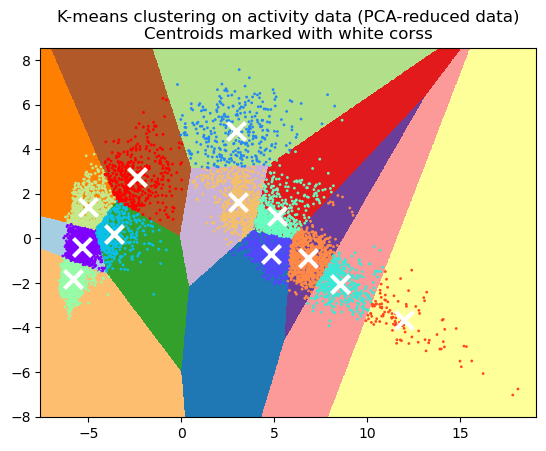

In [72]:
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z, 
    interpolation = 'nearest', 
    extent = (xx.min(), xx.max(), yy.min(), yy.max()), 
    cmap = plt.cm.Paired, 
    aspect='auto', 
    origin='lower'
)
plt.scatter(reduced_data[:,0], reduced_data[:,1], s=1, c=color_list)
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:,0],
    centroids[:,1],
    marker = 'x', 
    s = 169, 
    linewidths=3, 
    color='w', 
    zorder=10
)

plt.title(
    'K-means clustering on activity data (PCA-reduced data)\n'
    'Centroids marked with white corss'
)

Now to train and test a model

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

Can we use the Kneighbors classifier? 

In [74]:
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Xlabels, test_size=0.2, random_state=0)
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train).score(X_test, y_test)

0.9581724581724582

With 5 nearest neighbors get 96% accuracy, performing 10-fold cross-validation to see what if a different # of neighbors would give a better fit

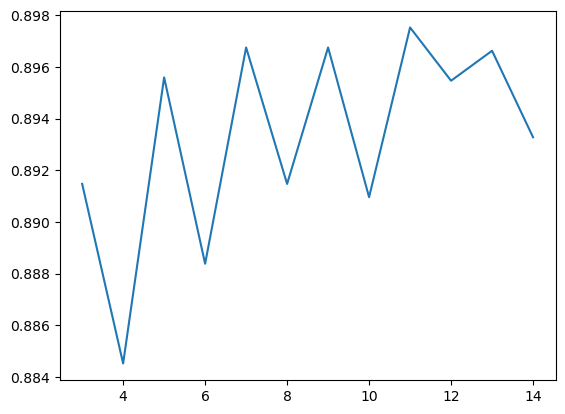

In [75]:
scores = cross_val_score(neigh, Xtrain, Xlabels, cv=10)
cv_mean = []
for n in range(3, 15): 
    neigh = KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(neigh, Xtrain, Xlabels, cv=10)
    cv_mean.append(np.mean(cv_scores))
plt.plot(range(3,15), cv_mean)

In [76]:
# Using the best finding from this range of values measured in cross-validation
best_nn = np.arange(3,15)[np.argmax(cv_mean)]
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train,y_train).score(X_test, y_test)

0.9581724581724582

Don't see much improvement when we change the number of nearest neighbors. KNN is not a good classifier for such high dimensional data so I would be suspicious of the performance of this model on a real test set. 

### Trying a support vector machine: 

In [77]:
from sklearn import svm

Perform cross validation again to find the best value for the cost parameter

In [78]:
cv_mean = []
for c_val in np.arange(-2, 1, 0.25):
    sv_classifier = svm.SVC(C=10**(c_val), gamma='auto', kernel='linear')
    cv_scores = cross_val_score(sv_classifier, X_train, y_train, cv=10)
    cv_mean.append(cv_scores.mean())

-0.5


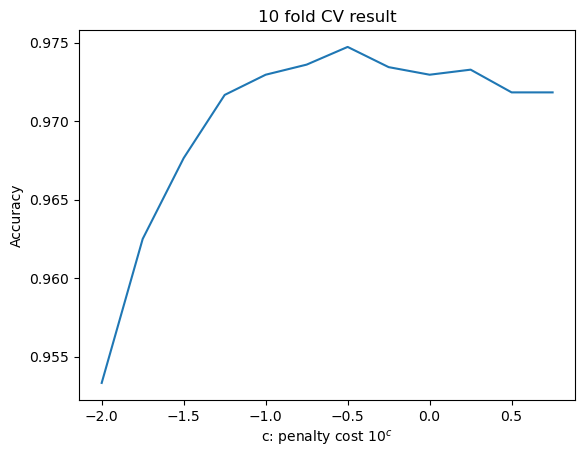

In [79]:
plt.plot(np.arange(-2, 1, 0.25), np.array(cv_mean))
plt.xlabel(rf'c: penalty cost $10^c$')
plt.ylabel('Accuracy')
plt.title('10 fold CV result')
print(np.arange(-2,1,0.25)[np.argmax(cv_mean)]) #best finding for the cost

In [80]:
c_best = -0.5
sv_classifier = svm.SVC(C=10**(c_best), gamma='auto', kernel='linear')
sv_classifier.fit(X_train, y_train).score(X_test, y_test)

0.9794079794079794

~97% accuracy. Better than KNN

### Trying a Neural Network:

In [81]:
from sklearn.neural_network import MLPClassifier

In [82]:
nn = MLPClassifier(alpha=1, hidden_layer_sizes=(256,), max_iter=1000, random_state=42)
nn.fit(X_train, y_train).score(X_test, y_test)

0.9523809523809523

With a very simple NN, achieve similar accuracy to what was before. Further tuning of this model will possibly get better accuracy. But good accuracy found with SVM, which is a much more simple and computationally less expensive model so we'll go with that. Next steps are to build a more advanced neural network using tensorflow, to see if can improve this accuracy